In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set matplotlib style
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial']
plt.rcParams['axes.unicode_minus'] = False

# Set plot style
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")


All libraries imported successfully!


In [20]:
# Load data
data_path = "../../Data/row_energyData_subsample_Transform/labeled/train/contact/part.0.parquet"

print(f"Loading data from: {data_path}")
df = pd.read_parquet(data_path)

print(f"Data shape: {df.shape}")
print(f"Column names: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

# Check anomaly label distribution
print(f"\nAnomaly label distribution:")
print(df['anomaly_label'].value_counts())
print(f"Anomaly ratio: {df['anomaly_label'].sum() / len(df) * 100:.2f}%")


Loading data from: ../../Data/row_energyData_subsample_Transform/labeled/train/contact/part.0.parquet
Data shape: (376939, 30)
Column names: ['TimeStamp', 'rTotalActivePower', 'rTotalReactivePower', 'rTotalApparentPower', 'rTotalReactiveEnergy', 'rTotalApparentEnergy', 'aCurrentL1', 'aCurrentL2', 'aCurrentL3', 'aVoltage_L1_N', 'aVoltage_L2_N', 'aVoltage_L3_N', 'aActivePower_L1', 'aActivePower_L2', 'aActivePower_L3', 'aReactivePower_L1', 'aReactivePower_L2', 'aReactivePower_L3', 'aApparentPower_L1', 'aApparentPower_L2', 'aApparentPower_L3', 'aCosPhi_L1', 'aCosPhi_L2', 'aCosPhi_L3', 'aPowerFactorPF_L2', 'airTotal', 'airDurchfluss', 'airTempeatur', 'segment_id', 'anomaly_label']

First 5 rows:
                  TimeStamp  rTotalActivePower  rTotalReactivePower  \
0 2023-12-31 00:00:00+00:00           0.572988             0.598406   
1 2023-12-31 00:01:00+00:00           1.617601             1.623712   
2 2023-12-31 00:02:00+00:00           1.437661             1.323100   
3 2023-12-31 00:

In [21]:
# Data preprocessing - separate features and labels
# Exclude non-feature columns (timestamp, segment_id, anomaly_label)
feature_columns = [col for col in df.columns if col not in ['TimeStamp', 'segment_id', 'anomaly_label']]

print(f"Number of feature columns: {len(feature_columns)}")
print(f"Feature column names: {feature_columns}")

# Prepare feature matrix X and label vector y
X = df[feature_columns].values
y = df['anomaly_label'].values

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# Check for missing values
print(f"\nNumber of NaN values in X: {np.isnan(X).sum()}")
print(f"Number of infinite values in X: {np.isinf(X).sum()}")

# Handle missing or infinite values if present
if np.isnan(X).sum() > 0 or np.isinf(X).sum() > 0:
    print("Handling missing and infinite values...")
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)


Number of feature columns: 27
Feature column names: ['rTotalActivePower', 'rTotalReactivePower', 'rTotalApparentPower', 'rTotalReactiveEnergy', 'rTotalApparentEnergy', 'aCurrentL1', 'aCurrentL2', 'aCurrentL3', 'aVoltage_L1_N', 'aVoltage_L2_N', 'aVoltage_L3_N', 'aActivePower_L1', 'aActivePower_L2', 'aActivePower_L3', 'aReactivePower_L1', 'aReactivePower_L2', 'aReactivePower_L3', 'aApparentPower_L1', 'aApparentPower_L2', 'aApparentPower_L3', 'aCosPhi_L1', 'aCosPhi_L2', 'aCosPhi_L3', 'aPowerFactorPF_L2', 'airTotal', 'airDurchfluss', 'airTempeatur']

X shape: (376939, 27)
y shape: (376939,)

Number of NaN values in X: 0
Number of infinite values in X: 0


In [ ]:
# Perform PCA analysis
print("Performing PCA analysis...")

# First compute all principal components (for variance explanation and loading matrix)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)

# Compute first 5 principal components for visualization
pca_5d = PCA(n_components=5)
X_pca_5d = pca_5d.fit_transform(X)

print(f"PCA dimensionality reduction completed!")
print(f"Original data dimensions: {X.shape}")
print(f"Reduced data dimensions: {X_pca_5d.shape}")

# Explained variance ratios for first 5 components
print(f"\nExplained variance ratios for first 5 principal components:")
for i, ratio in enumerate(pca_5d.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"Cumulative explained variance (first 5 PCs): {pca_5d.explained_variance_ratio_.sum():.4f} ({pca_5d.explained_variance_ratio_.sum()*100:.2f}%)")

# All principal components explained variance ratios (first 10)
print(f"\nExplained variance ratios for first 10 principal components:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")


Performing PCA analysis...
PCA dimensionality reduction completed!
Original data dimensions: (376939, 27)
Reduced data dimensions: (376939, 4)

Explained variance ratios for first 4 principal components:
PC1: 0.5176 (51.76%)
PC2: 0.1527 (15.27%)
PC3: 0.1121 (11.21%)
PC4: 0.0746 (7.46%)
Cumulative explained variance (first 4 PCs): 0.8571 (85.71%)

Explained variance ratios for first 10 principal components:
PC1: 0.5176 (51.76%)
PC2: 0.1527 (15.27%)
PC3: 0.1121 (11.21%)
PC4: 0.0746 (7.46%)
PC5: 0.0431 (4.31%)
PC6: 0.0274 (2.74%)
PC7: 0.0215 (2.15%)
PC8: 0.0186 (1.86%)
PC9: 0.0092 (0.92%)
PC10: 0.0081 (0.81%)


Sample counts displayed in plot:
  Normal samples: 339,877 (90.2%)
  Anomaly samples: 37,062 (9.8%)
  Total samples: 376,939


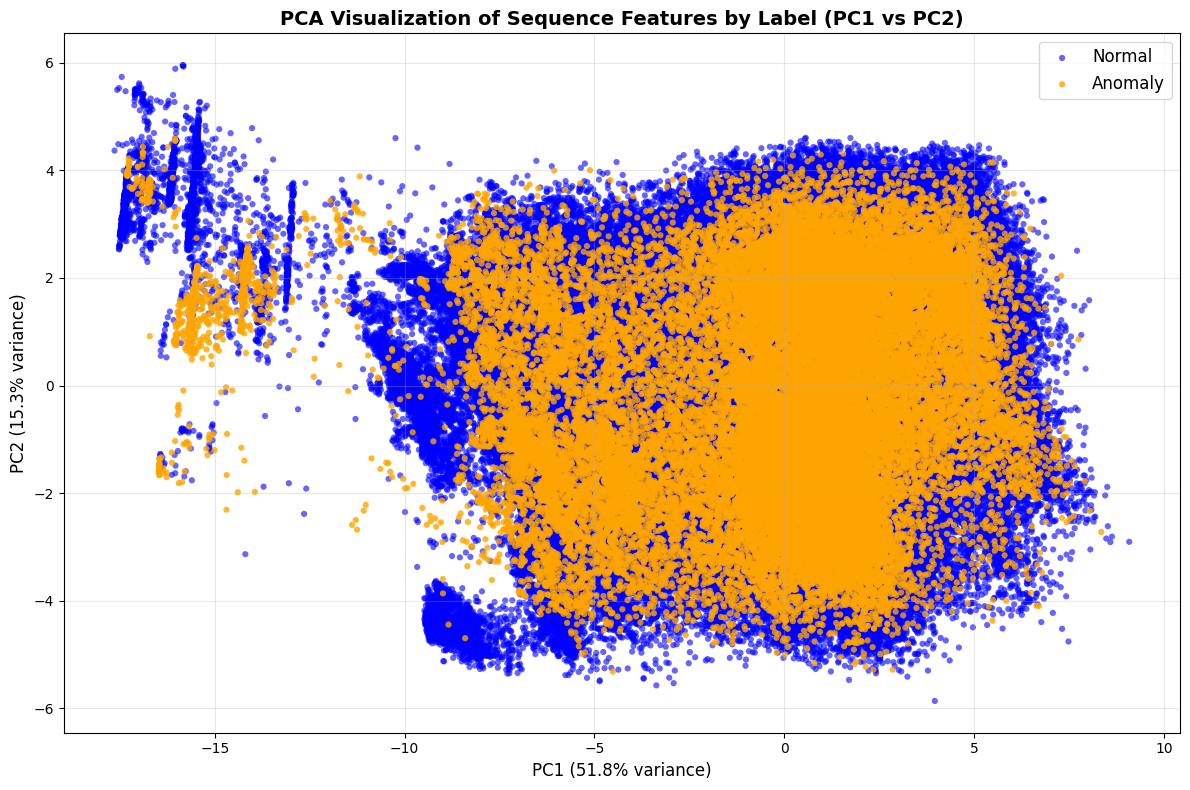

In [ ]:
# Create PCA scatter plot for PC1 vs PC2
plt.figure(figsize=(12, 8))

# Separate normal and anomaly samples
normal_mask = (y == 0)
anomaly_mask = (y == 1)

# Plot normal samples (blue)
plt.scatter(X_pca_5d[normal_mask, 0], X_pca_5d[normal_mask, 1], 
           c='blue', alpha=0.6, s=20, label='Normal', edgecolors='none')

# Plot anomaly samples (orange)
plt.scatter(X_pca_5d[anomaly_mask, 0], X_pca_5d[anomaly_mask, 1], 
           c='orange', alpha=0.8, s=20, label='Anomaly', edgecolors='none')

# Set plot properties
plt.xlabel(f'PC1 ({pca_5d.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_5d.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('PCA Visualization of Sequence Features by Label (PC1 vs PC2)', fontsize=14, fontweight='bold')

# Add legend
plt.legend(fontsize=12, loc='best')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display statistics
normal_count = np.sum(normal_mask)
anomaly_count = np.sum(anomaly_mask)
print(f"Sample counts displayed in plot:")
print(f"  Normal samples: {normal_count:,} ({normal_count/len(y)*100:.1f}%)")
print(f"  Anomaly samples: {anomaly_count:,} ({anomaly_count/len(y)*100:.1f}%)")
print(f"  Total samples: {len(y):,}")

plt.show()


PC3 vs PC4 visualization:
  PC3 explains 11.21% of variance
  PC4 explains 7.46% of variance
  Combined PC3+PC4 explain 18.67% of variance


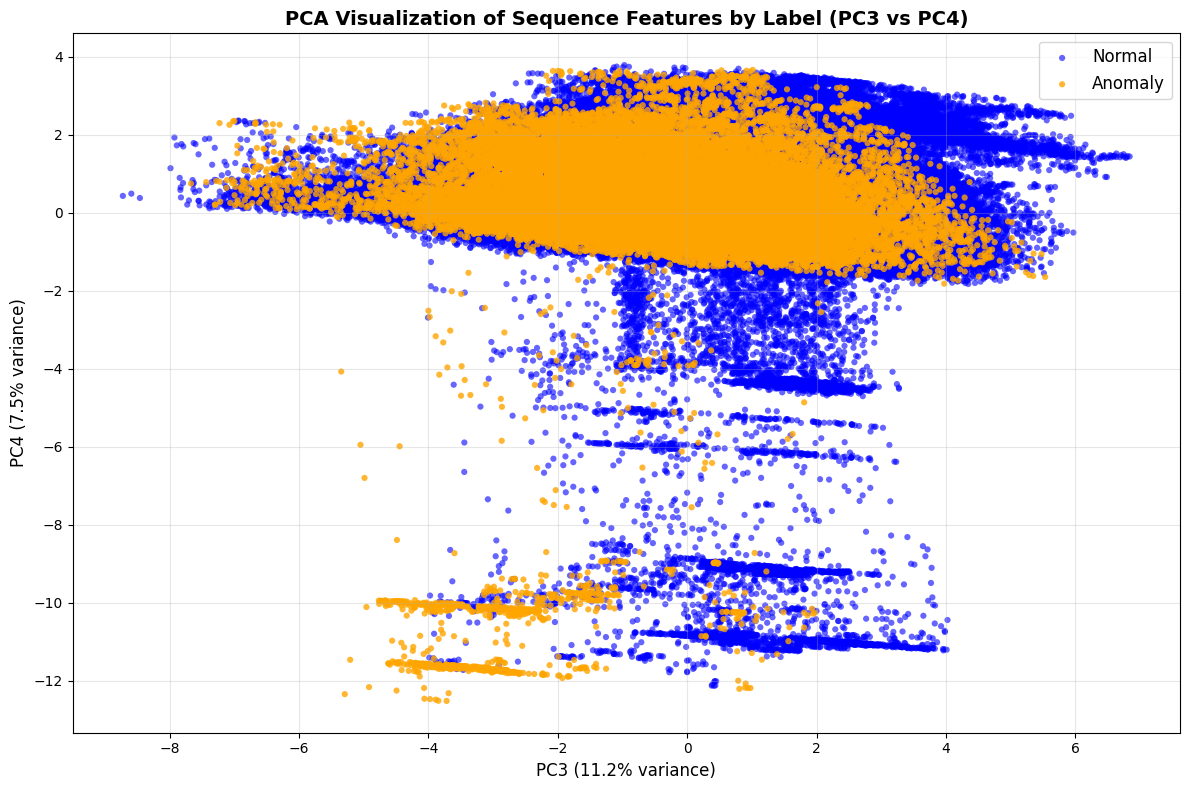

In [ ]:
# Create PCA scatter plot for PC3 vs PC4
plt.figure(figsize=(12, 8))

# Plot normal samples (blue)
plt.scatter(X_pca_5d[normal_mask, 2], X_pca_5d[normal_mask, 3], 
           c='blue', alpha=0.6, s=20, label='Normal', edgecolors='none')

# Plot anomaly samples (orange)
plt.scatter(X_pca_5d[anomaly_mask, 2], X_pca_5d[anomaly_mask, 3], 
           c='orange', alpha=0.8, s=20, label='Anomaly', edgecolors='none')

# Set plot properties
plt.xlabel(f'PC3 ({pca_5d.explained_variance_ratio_[2]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC4 ({pca_5d.explained_variance_ratio_[3]*100:.1f}% variance)', fontsize=12)
plt.title('PCA Visualization of Sequence Features by Label (PC3 vs PC4)', fontsize=14, fontweight='bold')

# Add legend
plt.legend(fontsize=12, loc='best')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

print(f"PC3 vs PC4 visualization:")
print(f"  PC3 explains {pca_5d.explained_variance_ratio_[2]*100:.2f}% of variance")
print(f"  PC4 explains {pca_5d.explained_variance_ratio_[3]*100:.2f}% of variance")
print(f"  Combined PC3+PC4 explain {(pca_5d.explained_variance_ratio_[2] + pca_5d.explained_variance_ratio_[3])*100:.2f}% of variance")

plt.show()


PC1 vs PC3 visualization:
  PC1 explains 51.76% of variance
  PC3 explains 11.21% of variance
  Combined PC1+PC3 explain 62.97% of variance


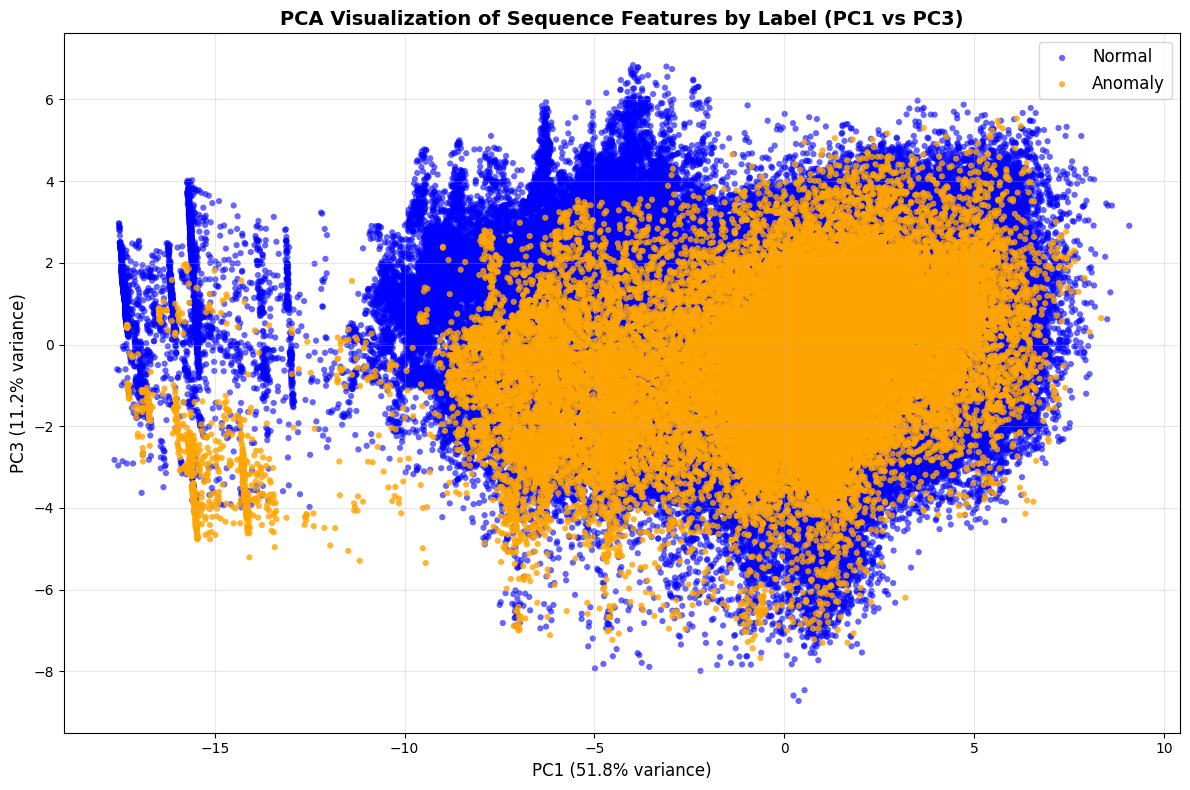

In [25]:
# Create PCA scatter plot for PC1 vs PC3
plt.figure(figsize=(12, 8))

# Plot normal samples (blue)
plt.scatter(X_pca_5d[normal_mask, 0], X_pca_5d[normal_mask, 2], 
           c='blue', alpha=0.6, s=20, label='Normal', edgecolors='none')

# Plot anomaly samples (orange)
plt.scatter(X_pca_5d[anomaly_mask, 0], X_pca_5d[anomaly_mask, 2], 
           c='orange', alpha=0.8, s=20, label='Anomaly', edgecolors='none')

# Set plot properties
plt.xlabel(f'PC1 ({pca_5d.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC3 ({pca_5d.explained_variance_ratio_[2]*100:.1f}% variance)', fontsize=12)
plt.title('PCA Visualization of Sequence Features by Label (PC1 vs PC3)', fontsize=14, fontweight='bold')

# Add legend
plt.legend(fontsize=12, loc='best')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

print(f"PC1 vs PC3 visualization:")
print(f"  PC1 explains {pca_5d.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"  PC3 explains {pca_5d.explained_variance_ratio_[2]*100:.2f}% of variance")
print(f"  Combined PC1+PC3 explain {(pca_5d.explained_variance_ratio_[0] + pca_5d.explained_variance_ratio_[2])*100:.2f}% of variance")

plt.show()


PC2 vs PC3 visualization:
  PC2 explains 15.27% of variance
  PC3 explains 11.21% of variance
  Combined PC2+PC3 explain 26.48% of variance


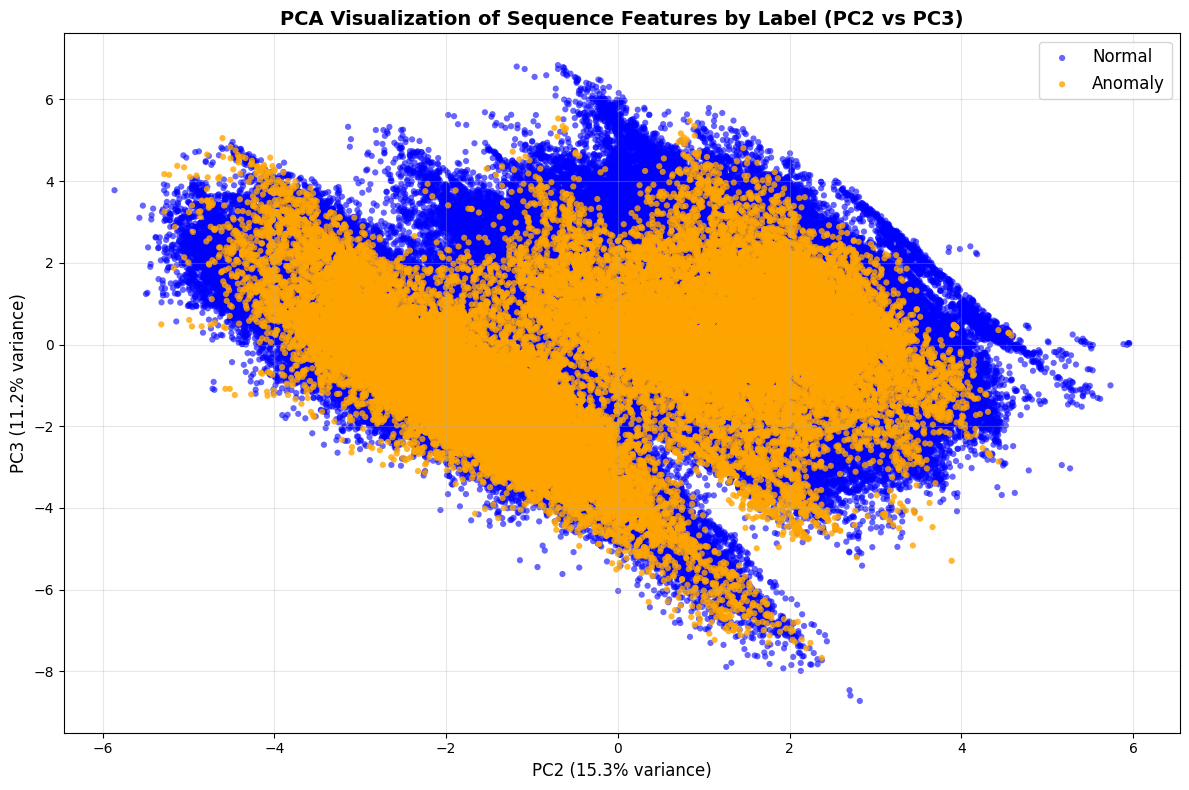

In [ ]:
# Create PCA scatter plot for PC4 vs PC5
plt.figure(figsize=(12, 8))

# Plot normal samples (blue)
plt.scatter(X_pca_5d[normal_mask, 3], X_pca_5d[normal_mask, 4], 
           c='blue', alpha=0.6, s=20, label='Normal', edgecolors='none')

# Plot anomaly samples (orange)
plt.scatter(X_pca_5d[anomaly_mask, 3], X_pca_5d[anomaly_mask, 4], 
           c='orange', alpha=0.8, s=20, label='Anomaly', edgecolors='none')

# Set plot properties
plt.xlabel(f'PC4 ({pca_5d.explained_variance_ratio_[3]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC5 ({pca_5d.explained_variance_ratio_[4]*100:.1f}% variance)', fontsize=12)
plt.title('PCA Visualization of Sequence Features by Label (PC4 vs PC5)', fontsize=14, fontweight='bold')

# Add legend
plt.legend(fontsize=12, loc='best')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

print(f"PC4 vs PC5 visualization:")
print(f"  PC4 explains {pca_5d.explained_variance_ratio_[3]*100:.2f}% of variance")
print(f"  PC5 explains {pca_5d.explained_variance_ratio_[4]*100:.2f}% of variance")
print(f"  Combined PC4+PC5 explain {(pca_5d.explained_variance_ratio_[3] + pca_5d.explained_variance_ratio_[4])*100:.2f}% of variance")

plt.show()


Cumulative explained variance for first 10 components:
  First 1 components: 0.5176 (51.76%)
  First 2 components: 0.6704 (67.04%)
  First 3 components: 0.7824 (78.24%)
  First 4 components: 0.8571 (85.71%)
  First 5 components: 0.9001 (90.01%)
  First 6 components: 0.9276 (92.76%)
  First 7 components: 0.9490 (94.90%)
  First 8 components: 0.9676 (96.76%)
  First 9 components: 0.9769 (97.69%)
  First 10 components: 0.9849 (98.49%)


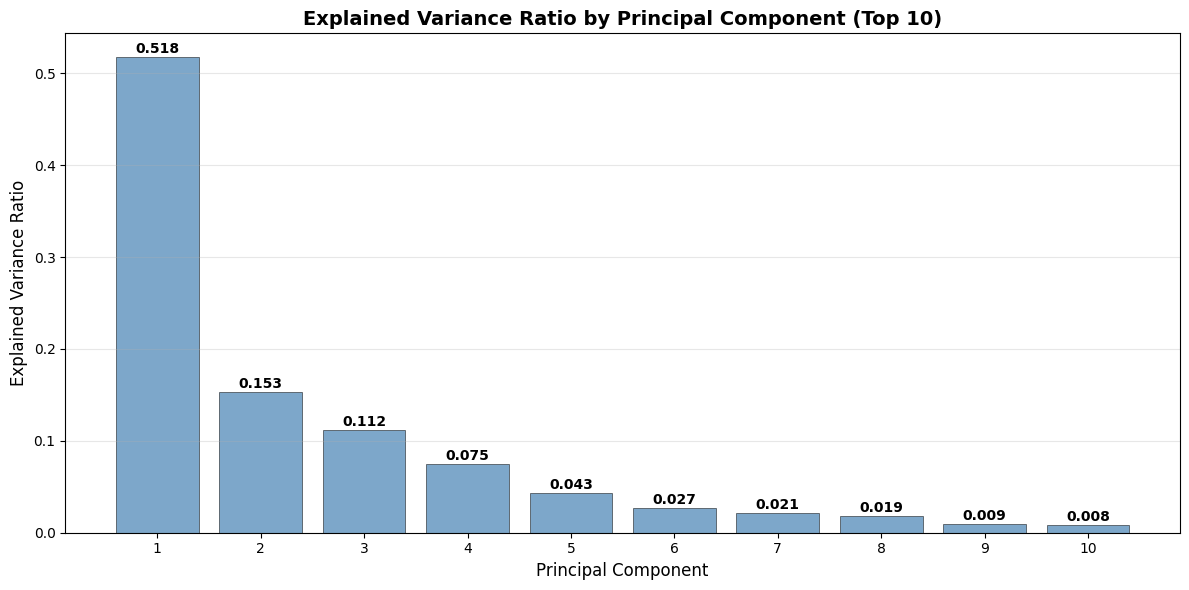


Number of components needed to reach different variance explanation levels:
  80.0% variance: 4 components (actual: 85.71%)
  90.0% variance: 5 components (actual: 90.01%)
  95.0% variance: 8 components (actual: 96.76%)
  99.0% variance: 12 components (actual: 99.40%)


In [27]:
# Create explained variance ratio bar chart
n_components_to_show = min(10, len(pca_full.explained_variance_ratio_))

plt.figure(figsize=(12, 6))

# Create bar chart
components = np.arange(1, n_components_to_show + 1)
variance_ratios = pca_full.explained_variance_ratio_[:n_components_to_show]

bars = plt.bar(components, variance_ratios, color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

# Add value labels on top of each bar
for i, (component, ratio) in enumerate(zip(components, variance_ratios)):
    plt.text(component, ratio + 0.001, f'{ratio:.3f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set plot properties
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title(f'Explained Variance Ratio by Principal Component (Top {n_components_to_show})', fontsize=14, fontweight='bold')

# Set x-axis ticks
plt.xticks(components)

# Add grid
plt.grid(True, alpha=0.3, axis='y')

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(variance_ratios)
print(f"Cumulative explained variance for first {n_components_to_show} components:")
for i, (comp, cum_var) in enumerate(zip(components, cumulative_variance)):
    print(f"  First {comp} components: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Adjust layout
plt.tight_layout()
plt.show()

# Additional analysis: show how many components needed for different variance thresholds
thresholds = [0.8, 0.9, 0.95, 0.99]
all_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

print(f"\nNumber of components needed to reach different variance explanation levels:")
for threshold in thresholds:
    n_needed = np.argmax(all_cumulative >= threshold) + 1
    actual_variance = all_cumulative[n_needed - 1]
    print(f"  {threshold*100}% variance: {n_needed} components (actual: {actual_variance*100:.2f}%)")


=== PCA Loading Matrix Analysis ===
Loading matrix shape: (27, 27)
  27 principal components
  27 original features

Loading matrix for first 10 principal components:
                         PC1     PC2     PC3     PC4     PC5     PC6     PC7  \
rTotalActivePower     0.2590 -0.0054 -0.0600 -0.1239  0.0597  0.0371  0.0784   
rTotalReactivePower   0.2544  0.0657  0.1052  0.0076 -0.0501 -0.0318  0.0311   
rTotalApparentPower   0.2552 -0.1007  0.0511  0.0343  0.1557  0.0219 -0.0643   
rTotalReactiveEnergy -0.0198  0.3632  0.2154  0.1769  0.3581 -0.2047  0.0844   
rTotalApparentEnergy -0.0148  0.4296  0.2266  0.1267  0.1247 -0.0947  0.0267   
aCurrentL1            0.2006 -0.2264 -0.0934  0.0607  0.3879 -0.0112  0.1341   
aCurrentL2            0.2539  0.0727  0.0864  0.0297  0.0166 -0.0000 -0.2169   
aCurrentL3            0.2586 -0.0046  0.0668  0.0027 -0.0519  0.0557 -0.1892   
aVoltage_L1_N        -0.0490 -0.2233  0.4927 -0.0396 -0.0243  0.0520  0.0891   
aVoltage_L2_N        -0.0480 -0.2

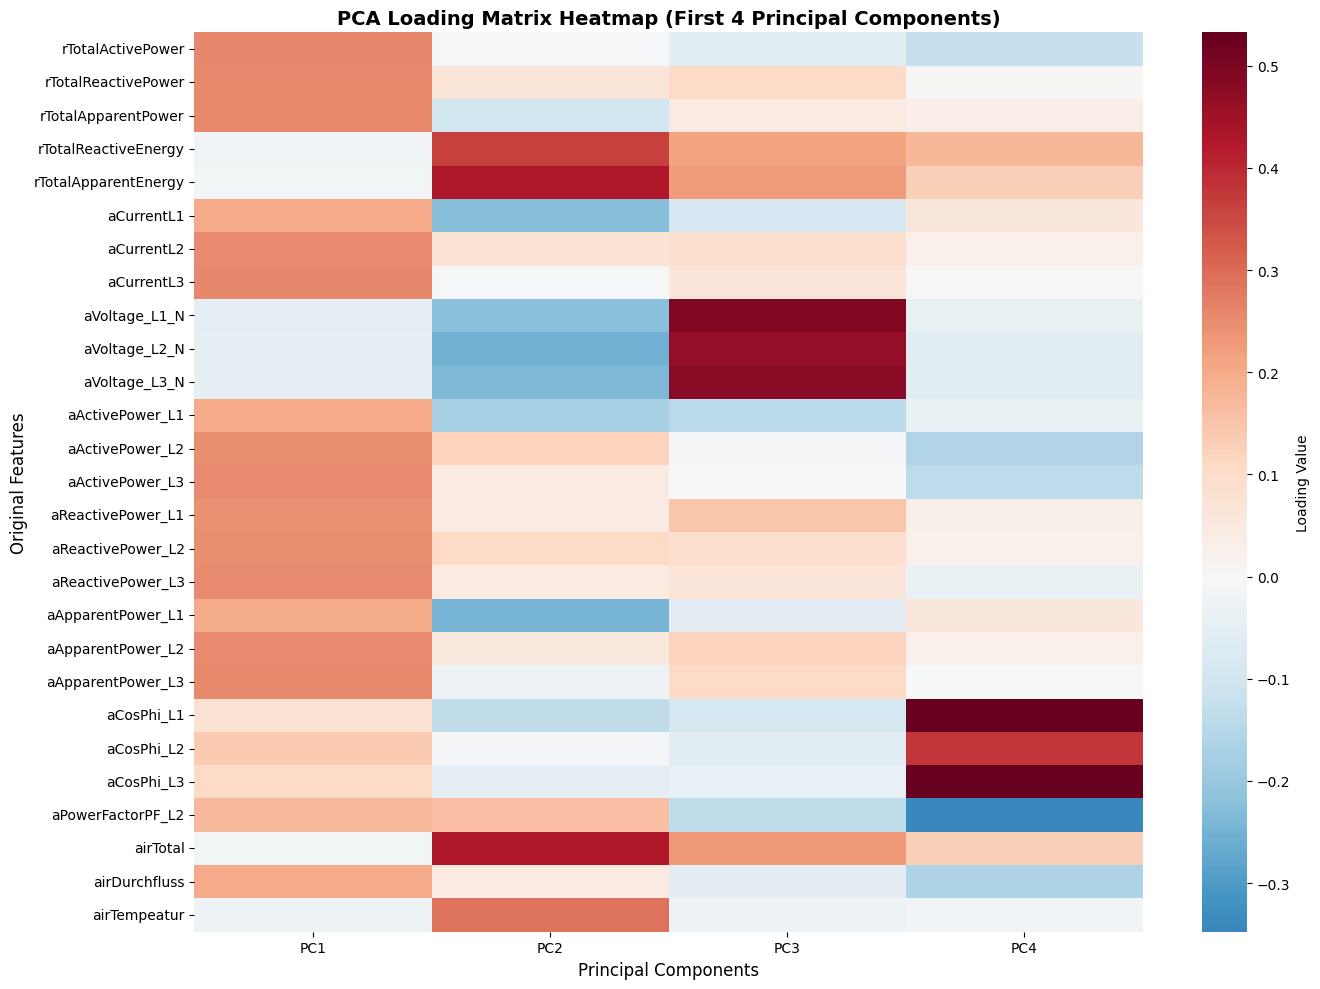


Top 5 features with highest absolute loadings for each of the first 4 PCs:

PC1:
  1. rTotalActivePower: 0.2590 (abs: 0.2590)
  2. aCurrentL3: 0.2586 (abs: 0.2586)
  3. aApparentPower_L3: 0.2553 (abs: 0.2553)
  4. rTotalApparentPower: 0.2552 (abs: 0.2552)
  5. rTotalReactivePower: 0.2544 (abs: 0.2544)

PC2:
  1. rTotalApparentEnergy: 0.4296 (abs: 0.4296)
  2. airTotal: 0.4294 (abs: 0.4294)
  3. rTotalReactiveEnergy: 0.3632 (abs: 0.3632)
  4. airTempeatur: 0.2879 (abs: 0.2879)
  5. aVoltage_L2_N: -0.2555 (abs: 0.2555)

PC3:
  1. aVoltage_L1_N: 0.4927 (abs: 0.4927)
  2. aVoltage_L3_N: 0.4800 (abs: 0.4800)
  3. aVoltage_L2_N: 0.4672 (abs: 0.4672)
  4. airTotal: 0.2274 (abs: 0.2274)
  5. rTotalApparentEnergy: 0.2266 (abs: 0.2266)

PC4:
  1. aCosPhi_L3: 0.5327 (abs: 0.5327)
  2. aCosPhi_L1: 0.5274 (abs: 0.5274)
  3. aCosPhi_L2: 0.3789 (abs: 0.3789)
  4. aPowerFactorPF_L2: -0.3476 (abs: 0.3476)
  5. rTotalReactiveEnergy: 0.1769 (abs: 0.1769)


In [28]:
# Loading Matrix Analysis
print("=== PCA Loading Matrix Analysis ===")

# Get the loading matrix (components matrix)
# Each row represents a principal component, each column represents an original feature
loading_matrix = pca_full.components_

print(f"Loading matrix shape: {loading_matrix.shape}")
print(f"  {loading_matrix.shape[0]} principal components")
print(f"  {loading_matrix.shape[1]} original features")

# Create a DataFrame for better visualization
loading_df = pd.DataFrame(
    loading_matrix[:10].T,  # First 10 PCs, transpose to have features as rows
    columns=[f'PC{i+1}' for i in range(10)],
    index=feature_columns
)

print(f"\nLoading matrix for first 10 principal components:")
print(loading_df.round(4))

# Visualize loading matrix as heatmap for first 5 PCs
plt.figure(figsize=(16, 10))

# Create heatmap
sns.heatmap(loading_df.iloc[:, :5], 
            annot=False, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={'label': 'Loading Value'})

plt.title('PCA Loading Matrix Heatmap (First 5 Principal Components)', fontsize=14, fontweight='bold')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Original Features', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find features with highest absolute loadings for each PC
print(f"\nTop 5 features with highest absolute loadings for each of the first 5 PCs:")
for i in range(5):
    pc_loadings = loading_df.iloc[:, i].abs().sort_values(ascending=False)
    print(f"\nPC{i+1}:")
    for j, (feature, loading) in enumerate(pc_loadings.head(5).items()):
        original_loading = loading_df.loc[feature, f'PC{i+1}']
        print(f"  {j+1}. {feature}: {original_loading:.4f} (abs: {loading:.4f})")
